# Linear Regression
## This notebook outlines the concepts behind the theory of Linear Regression

## Fitting a straight line

y = ax + b

- a : slope
- b : intercept

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set() 
import numpy as np

### Plot some random points for fitting a straight line

### y = 2 * x - 5 (a = 2 , b = -5)

In [7]:
rng = np.random.RandomState(1) 
x = 10 * rng.rand(50)
y= 2 * x - 5 + rng.randn(50) 
plt.scatter(x, y);

### Exploration of random points generation

In [10]:
rng.rand(50)

array([0.93259546, 0.69681816, 0.06600017, 0.75546305, 0.75387619,
       0.92302454, 0.71152476, 0.12427096, 0.01988013, 0.02621099,
       0.02830649, 0.24621107, 0.86002795, 0.53883106, 0.55282198,
       0.84203089, 0.12417332, 0.27918368, 0.58575927, 0.96959575,
       0.56103022, 0.01864729, 0.80063267, 0.23297427, 0.8071052 ,
       0.38786064, 0.86354185, 0.74712164, 0.55624023, 0.13645523,
       0.05991769, 0.12134346, 0.04455188, 0.10749413, 0.22570934,
       0.71298898, 0.55971698, 0.01255598, 0.07197428, 0.96727633,
       0.56810046, 0.20329323, 0.25232574, 0.74382585, 0.19542948,
       0.58135893, 0.97001999, 0.8468288 , 0.23984776, 0.49376971])

In [12]:
10 * rng.rand(50)

array([6.19955718, 8.289809  , 1.56791395, 0.18576202, 0.70022144,
       4.86345111, 6.06329462, 5.68851437, 3.17362409, 9.88616154,
       5.79745219, 3.80141173, 5.50948219, 7.45334431, 6.69232893,
       2.64919558, 0.66334834, 3.70084198, 6.29717507, 2.1017401 ,
       7.52755554, 0.66536481, 2.60315099, 8.04754564, 1.93434283,
       6.39460881, 5.24670309, 9.2480797 , 2.6329677 , 0.65961091,
       7.35065963, 7.7217803 , 9.07815853, 9.31972069, 0.13951573,
       2.34362086, 6.16778357, 9.49016321, 9.50176119, 5.56653188,
       9.1560635 , 6.41566209, 3.90007714, 4.85990667, 6.04310483,
       5.49547922, 9.26181427, 9.18733436, 3.94875613, 9.63262528])

In [14]:
10 * rng.rand(50)

array([1.73955667e+00, 1.26329519e+00, 1.35079158e+00, 5.05662166e+00,
       2.15248053e-01, 9.47970211e+00, 8.27115471e+00, 1.50189807e-01,
       1.76196256e+00, 3.32063574e+00, 1.30996845e+00, 8.09490692e+00,
       3.44736653e+00, 9.40107482e+00, 5.82014180e+00, 8.78831984e+00,
       8.44734445e+00, 9.05392319e+00, 4.59880266e+00, 5.46346816e+00,
       7.98603591e+00, 2.85718852e+00, 4.90253523e+00, 5.99110308e+00,
       1.55332756e-01, 5.93481408e+00, 4.33676349e+00, 8.07360529e+00,
       3.15244803e+00, 8.92888709e+00, 5.77857215e+00, 1.84010202e+00,
       7.87929234e+00, 6.12031177e+00, 5.39092721e-01, 4.20193680e+00,
       6.79068837e+00, 9.18601778e+00, 4.02024891e-03, 9.76759149e+00,
       3.76580315e+00, 9.73783538e+00, 6.04716101e+00, 8.28845808e+00,
       5.74711505e+00, 6.28076198e+00, 2.85576282e+00, 5.86833341e+00,
       7.50021764e+00, 8.58313836e+00])

In [16]:
y= 2 * x - 5 + rng.randn(50) 
y

array([ 4.15139177, 10.45093196, -5.3985907 ,  1.87065707, -2.62718761,
       -1.19835003, -2.60674744,  0.15052598,  1.28462822,  4.8857791 ,
        2.26477489, 10.66046891, -1.2374545 , 11.21967294, -3.33786516,
        7.82282626,  2.10924267,  7.0496355 , -1.56889905, -1.4729269 ,
       12.42243137, 14.49433309,  2.88543316,  9.3491932 , 14.08658859,
       13.00153597, -4.51886017, -1.76953569, -2.14916578, 12.36401221,
       -3.73346183,  3.21875805, 14.40046004,  5.86513588,  9.49856257,
        3.10247083,  8.60955398, 10.4593927 , -5.81655258,  9.33713178,
       13.10302597, 10.78834291,  0.11066628, 10.47460159, -2.93737135,
        2.5612501 , 12.3105937 ,  1.54699449,  1.3740459 , -2.84260049])

In [18]:
y= 2 * x - 5 + rng.randn(50) 
y

array([ 5.15097501,  8.10076295, -5.34269971,  0.81581171, -4.85796718,
       -1.21569929, -0.90846376,  0.86662516,  4.98652293,  6.36199668,
        3.81341643,  8.09739161, -0.80473228, 11.03666841, -3.65722204,
        8.03491188,  3.48014424,  7.37585143, -1.90751312, -0.77550277,
       11.29139068, 13.63195991,  2.10448828, 10.38981142, 13.28658871,
       13.77704208, -4.17639729, -5.08669156, -3.04426763, 13.79510314,
       -3.28724319,  4.82199644, 13.37587892,  5.22579672,  8.93296737,
        2.23176269,  8.79076875, 11.90363819, -4.61770689, 10.18007402,
       13.66075176, 10.04424019,  0.42230085, 10.72876209, -2.44314331,
        3.27719238, 13.08740203,  0.57492108,  1.17280878, -1.61465791])

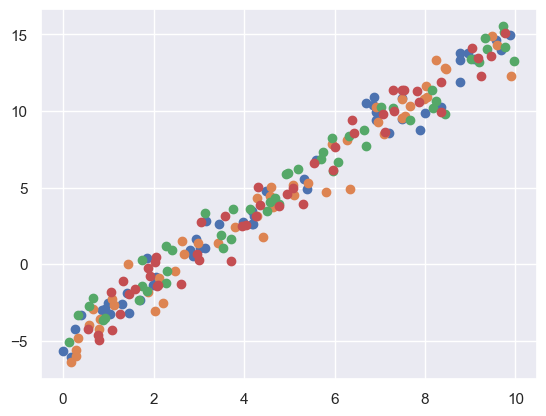

In [24]:
x = 10 * rng.rand(50)
y= 2 * x - 5 + rng.randn(50) 
plt.scatter(x, y);
plt.show()

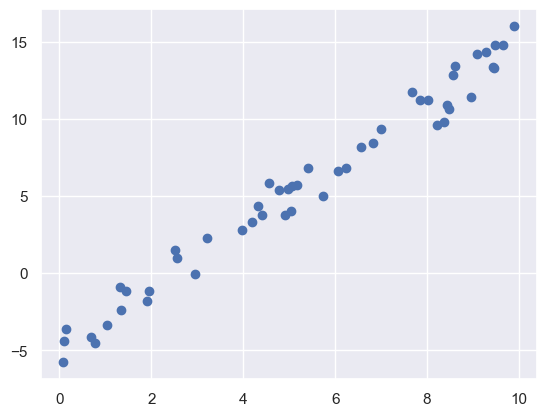

In [26]:
x = 10 * rng.rand(50)
y= 2 * x - 5 + rng.randn(50) 
plt.scatter(x, y);
plt.show()

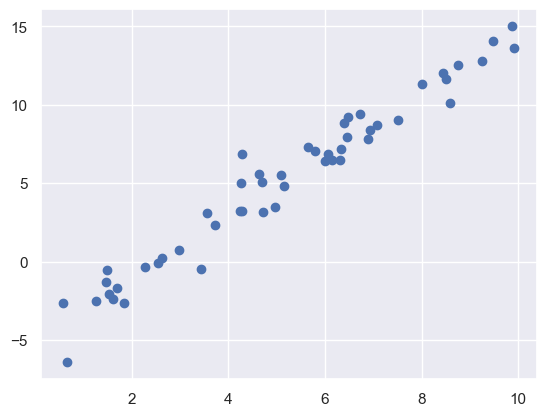

In [28]:
x = 10 * rng.rand(50)
y= 2 * x - 5 + rng.randn(50) 
plt.scatter(x, y);
plt.show()

### Finally !

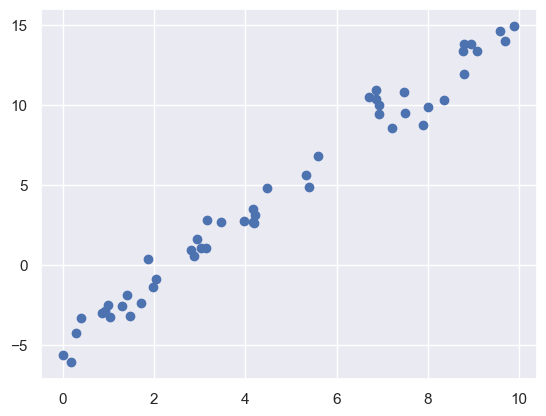

In [30]:
rng = np.random.RandomState(1) 
x = 10 * rng.rand(50)
y= 2 * x - 5 + rng.randn(50) 
plt.scatter(x, y);
plt.show()

### Scikit-learn's LinearRegression estimator

In [32]:
from sklearn.linear_model import LinearRegression 

In [33]:
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y) 

LinearRegression()

In [36]:
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis]) 

In [38]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

In [40]:
model.coef_

array([2.02720881])

In [42]:
model.intercept_

-4.9985770855532

### We *almost* got the original Slope and Intercept of a = 2 and b = -5

### Now, that's what we call a good estimator

### What did we do here?

### We did it for one dimesional feature x. 

### Now, Can we try it for multi-dimensional features x1, x2, x3, and so on?

### The problem now becomes not fitting a line but fitting a ...... in 3 dimesions and fitting a ..... in higher than 3 dimensions

### Lets build some points with the following equation
### y = 5 + 1.5 *X1 - 2 *X2 + 2 *X3

In [45]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 5 + np.dot(X, [1.5, -2., 2.])

In [47]:
X

array([[4.17022005e+00, 7.20324493e+00, 1.14374817e-03],
       [3.02332573e+00, 1.46755891e+00, 9.23385948e-01],
       [1.86260211e+00, 3.45560727e+00, 3.96767474e+00],
       [5.38816734e+00, 4.19194514e+00, 6.85219500e+00],
       [2.04452250e+00, 8.78117436e+00, 2.73875932e-01],
       [6.70467510e+00, 4.17304802e+00, 5.58689828e+00],
       [1.40386939e+00, 1.98101489e+00, 8.00744569e+00],
       [9.68261576e+00, 3.13424178e+00, 6.92322616e+00],
       [8.76389152e+00, 8.94606664e+00, 8.50442114e-01],
       [3.90547832e-01, 1.69830420e+00, 8.78142503e+00],
       [9.83468338e-01, 4.21107625e+00, 9.57889530e+00],
       [5.33165285e+00, 6.91877114e+00, 3.15515631e+00],
       [6.86500928e+00, 8.34625672e+00, 1.82882773e-01],
       [7.50144315e+00, 9.88861089e+00, 7.48165654e+00],
       [2.80443992e+00, 7.89279328e+00, 1.03226007e+00],
       [4.47893526e+00, 9.08595503e+00, 2.93614148e+00],
       [2.87775339e+00, 1.30028572e+00, 1.93669579e-01],
       [6.78835533e+00, 2.11628

In [49]:
y

array([-3.1488723 ,  8.44664267,  8.81803811, 18.40275073, -8.94781312,
       17.88471317, 19.15866567, 27.10189239,  1.95458824, 19.75206343,
       17.21084061,  5.47024962, -1.02923398, 11.43825603, -4.51440656,
       -0.5812242 ,  7.10339779, 16.26090386, 22.7886986 ,  9.40998509,
       12.14189983, 20.93154798, 23.55103256, -1.52021862, -1.10514383,
       -4.11454146, 19.40834366,  6.31420126, -0.30698219, 18.63768516,
       -3.27035291, 10.25364777,  7.13450962, 18.26543771, 29.31443931,
       32.62272155, -1.13619308,  2.34149021,  5.95826531,  7.1002921 ,
        5.34011203,  2.26922833, -1.06482186, 16.86448472, 29.05516095,
        0.10972308, 14.13549964,  8.27534371,  8.03258237,  4.75161467,
       -1.90390317, 17.87940071, 15.70466345, 22.78087112,  0.85554568,
       13.60510238,  9.06516137, 15.83716138, 11.74219254, 15.04878063,
       25.29739348, 16.88683652,  5.6057028 , 14.92540596, 18.73874591,
       23.3877913 , 14.27487133,  7.86899501, 13.21651203, 13.09

In [51]:
model.fit(X, y) 
print(model.intercept_) 
print(model.coef_)

5.000000000000011
[ 1.5 -2.   2. ]


#### Wow !! We 've recovered the X1, X2 and X3 that we used to construct the data points in the form of Coefficients

# Non-linear relationships

So far, we have seen **linear relationships** between X and y. Let's see if we can establish any **non-linear relationships**. This is accomplished using **Basis Functions**.

## Basis Functions

Linear Regression model = linear combination of input variables = Linear Basis function model

y = w0 + w1 x1 + w2 x2 + ... + wn xn

- Linear function of parameters (coefficients) Ws
- **Limitation**: Linear function of Input variables (Features) Xs

Good to establish linear relationships



But not good to establish non-linear relationships in data, which is quite often true in real world data.


Consider building a model as a combination of non-linear functions of input variables.

Basis functions = class of functions which are linear combinations of fixed-set of some non-linear functions of input variables.



Many Basis functions exists. 

Examples: 
- Polynomials
- Gaussian
- Radial
- Fourier
- Wavelets

## Polynomial Basis Functions

### PolynomialFeatures

In [91]:
from sklearn.preprocessing import PolynomialFeatures

In [93]:
x = np.array([2, 3, 4])
x

array([2, 3, 4])

### Create a higher dimensional data

In [96]:
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:,None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

### Let us plot a non-linear data (sine wave) and try to estimate the parameter fit

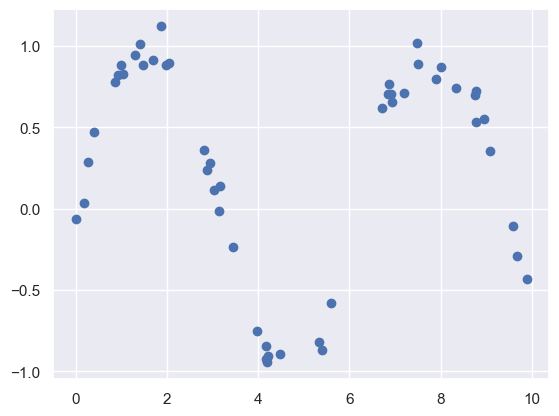

In [99]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
plt.scatter(x, y)
plt.show()

### Fit the previous linear model to the non-linear data

0.34794576296220453
[-0.01203828]


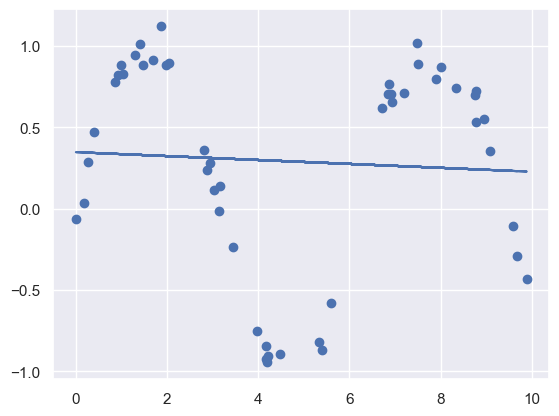

In [102]:
model.fit(x[:, np.newaxis], y)
print(model.intercept_) 
print(model.coef_)
yf = model.predict(x[:, np.newaxis])
plt.scatter(x,y)
plt.plot(x,yf)
plt.show()

### Now, fit the data with a non-linear model

### Use the higher-order polynomial function to model the data

In [104]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

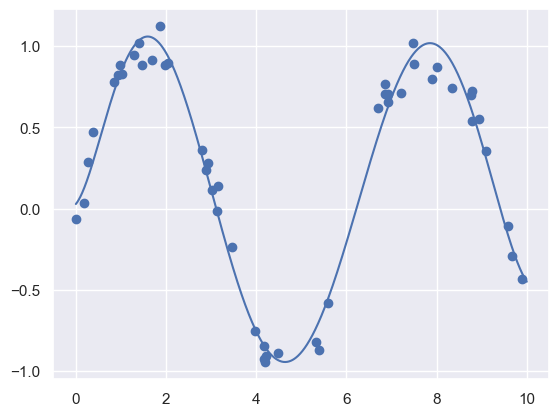

In [106]:
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x,y)
plt.plot(xfit, yfit);
plt.show()

#### Awesome. We almost recovered the non-linearity!

## Gaussian Basis Functions

### Helper Function

In [76]:
# Source: Jake Vanderplas' DataScience Handbook
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)

### Let us the take the same sine wave as the non-linear data

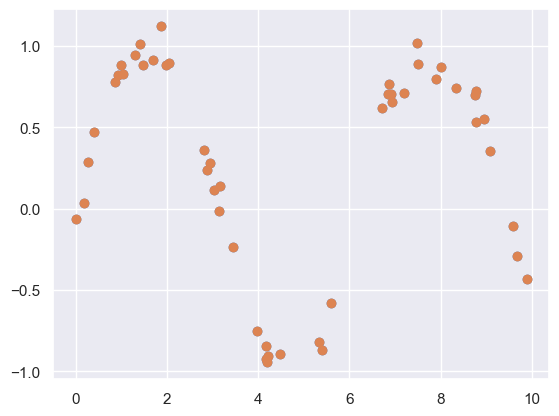

In [81]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
plt.scatter(x, y)
plt.show()

### Make a pipeline with GaussianFeatures and LinearRegression

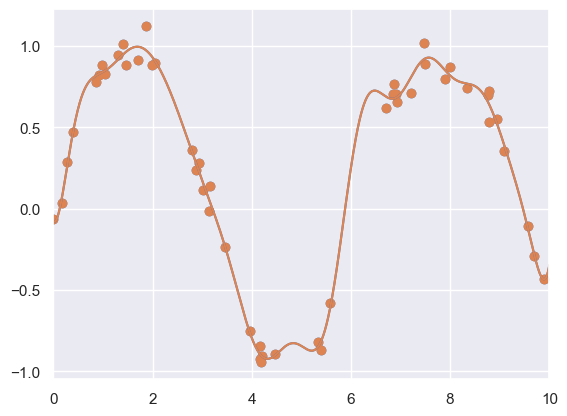

In [85]:
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);
plt.show()

## Sigmoidal Basis Functions

### Homework: Can you try replacing this Gaussian basis with a Sigmoidal Basis Function?

In [108]:
@staticmethod
def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))

### Steps:
- Take the same Sine wave
- Replace the Gaussian Basis with Sigmoidal Basis function
- Make a pipeline with Sigmoid and LinearRegression
- Fit the model
- Predict the model
- Plot the fitted curve on the sine wave data

# Regularization

Introduction of Basis functions into our armory will actually make us fit the data too perfect resulting in **OVERFITTING**.

To avoid that, we use **regularization**.

### Motivation

### Let us increase the number of Gaussian Basis functions to fit the sine wave data

In [110]:
plt.scatter(x, y)

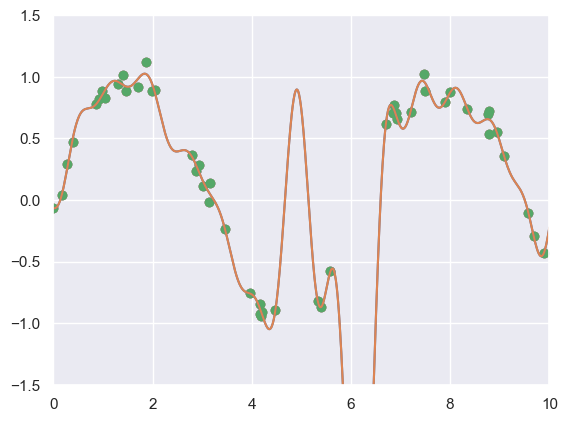

In [114]:
model = make_pipeline(GaussianFeatures(30),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);
plt.show()

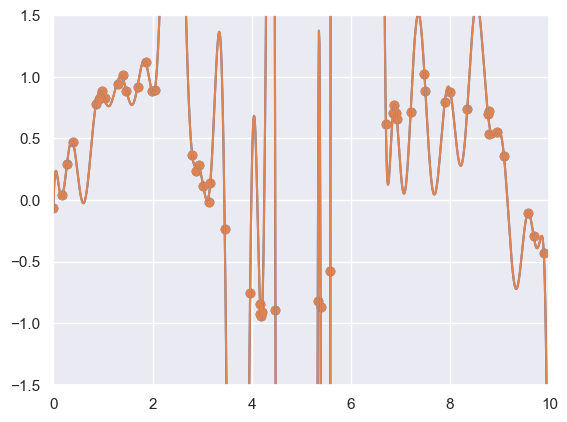

In [118]:
model = make_pipeline(GaussianFeatures(40),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);
plt.show()

Not good at all.

### Helper function to plot the coefficients of Gaussian bases

In [120]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))

In [122]:
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

## Lasso Regression L1

- Penalizes the sum of absolute values of coefficients
- Sets model coefficients to zero

In [124]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')

C:\Users\wayne\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e-03, tolerance: 2.065e-03
  model = cd_fast.enet_coordinate_descent(


## Ridge Regression L2

- Penalizes the sum of squares of model coefficients
- alpha
    - if alpha -> 0, standard linear regression
    - if alpha -> large, underfitting might happen

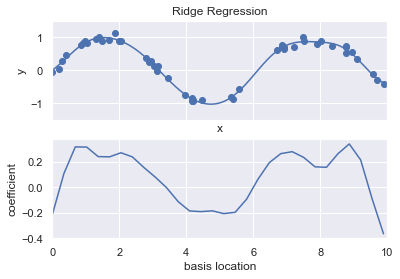

In [93]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

## ElasticNet Regression

- Combines both L1 and L2 regularizers
- l1_ratio parameter

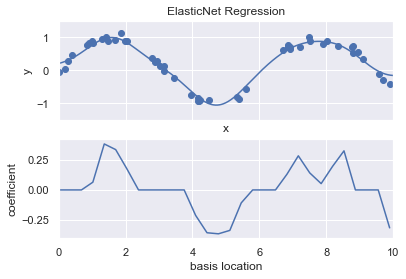

In [97]:
from sklearn.linear_model import ElasticNet
model = make_pipeline(GaussianFeatures(30), ElasticNet(alpha=0.01, l1_ratio=0.6))
basis_plot(model, title='ElasticNet Regression')